importing libraries

In [12]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import calendar
import matplotlib.pyplot as plt

%autosave 1

Autosaving every 1 seconds


In [13]:
df = pd.read_csv("gun-violence-data_01-2013_03-2018.csv")

I have found that there is a missing row in the data 

to fix this row in the dataset

According to the author of this dataset, one particular incident is missing from the dataset

I have manually added this incident [read here](https://www.kaggle.com/jameslko/gun-violence-data/discussion/55307)

In [14]:
missing_row = ['sban_1', '2017-10-01', 'Nevada', 'Las Vegas', 'Mandalay Bay 3950 Blvd S', 59, 489, 'https://en.wikipedia.org/wiki/2017_Las_Vegas_shooting', 'https://en.wikipedia.org/wiki/2017_Las_Vegas_shooting', '-', '-', '-', '-', '-', '36.095', 'Hotel', 
               '-115.171667', 47, 'Route 91 Harvest Festiva; concert, open fire from 32nd floor. 47 guns seized; TOTAL:59 kill, 489 inj, number shot TBD,girlfriend Marilou Danley POI', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
df.loc[len(df)] = missing_row

In [15]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['monthday'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['loss'] = df['n_killed'] + df['n_injured']

In [16]:
df

incident_id       date           state city_or_county  \
0           461105 2013-01-01    Pennsylvania     Mckeesport   
1           460726 2013-01-01      California      Hawthorne   
2           478855 2013-01-01            Ohio         Lorain   
3           478925 2013-01-05        Colorado         Aurora   
4           478959 2013-01-07  North Carolina     Greensboro   
...            ...        ...             ...            ...   
239673     1083139 2018-03-31       Louisiana   Natchitoches   
239674     1083151 2018-03-31       Louisiana         Gretna   
239675     1082514 2018-03-31           Texas        Houston   
239676     1081940 2018-03-31           Maine   Norridgewock   
239677      sban_1 2017-10-01          Nevada      Las Vegas   

                                          address  n_killed  n_injured  \
0       1506 Versailles Avenue and Coursin Street         0          4   
1                    13500 block of Cerise Avenue         1          3   
2                           1776 East 28th Street         1          3   
3                16000 block of East Ithaca Place         4          0   
4                       307 Mourning Dove Terrace         2          2   
...                                           ...       ...        ...   
239673                             247 Keyser Ave         1          0   
239674                  1300 block of Cook Street         0          1   
239675                     12630 Ashford Point Dr         1          0   
239676                           434 Skowhegan Rd         2          0   
239677                   Mandalay Bay 3950 Blvd S        59        489   

                                             incident_url  \
0       http://www.gunviolencearchive.org/incident/461105   
1       http://www.gunviolencearchive.org/incident/460726   
2       http://www.gunviolencearchive.org/incident/478855   
3       http://www.gunviolencearchive.org/incident/478925   
4       http://www.gunviolencearchive.org/incident/478959   
...                                                   ...   
239673  http://www.gunviolencearchive.org/incident/108...   
239674  http://www.gunviolencearchive.org/incident/108...   
239675  http://www.gunviolencearchive.org/incident/108...   
239676  http://www.gunviolencearchive.org/incident/108...   
239677  https://en.wikipedia.org/wiki/2017_Las_Vegas_s...   

                                               source_url  \
0       http://www.post-gazette.com/local/south/2013/0...   
1       http://www.dailybulletin.com/article/zz/201301...   
2       http://chronicle.northcoastnow.com/2013/02/14/...   
3       http://www.dailydemocrat.com/20130106/aurora-s...   
4       http://www.journalnow.com/news/local/article_d...   
...                                                   ...   
239673  http://www.ksla.com/story/37854648/man-wanted-...   
239674  http://www.nola.com/crime/index.ssf/2018/04/sh...   
239675  https://www.chron.com/news/houston-texas/houst...   
239676  https://www.centralmaine.com/2018/03/31/police...   
239677  https://en.wikipedia.org/wiki/2017_Las_Vegas_s...   

       incident_url_fields_missing  ...  \
0                            False  ...   
1                            False  ...   
2                            False  ...   
3                            False  ...   
4                            False  ...   
...                            ...  ...   
239673                       False  ...   
239674                       False  ...   
239675                       False  ...   
239676                       False  ...   
239677                           -  ...   

                                       participant_status  \
0       0::Arrested||1::Injured||2::Injured||3::Injure...   
1           0::Killed||1::Injured||2::Injured||3::Injured   
2       0::Injured, Unharmed, Arrested||1::Unharmed, A...   
3              0::Killed||1::Killed||2::Killed||3::Killed   
4            0::Injured||1::Injured||2::Killed||3::Killed   


In [17]:
df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district', 'year', 'month', 'monthday', 'weekday',
       'loss'],
      dtype='object')

**Number of gun violence per year**

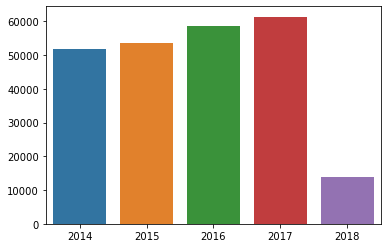

In [18]:
# function to aggregate and return keys and values
def create_stack_bar_data(col):
    aggregated = df[col].value_counts()
    x_values = aggregated.index.tolist()
    y_values = aggregated.values.tolist()
    return x_values, y_values

x1, y1 = create_stack_bar_data('year')
x1 = x1[:-1]
y1 = y1[:-1]

sns.barplot(x=x1, y=y1, data=df);

**Average number of incidents per month**

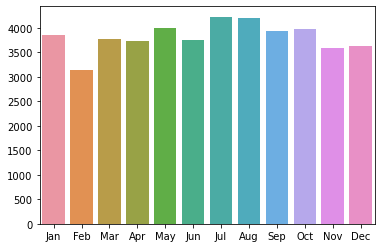

In [19]:
tempdf = df[df['year'].isin([2013,2014,2015,2016,2017,2018])]
tempdf1 = tempdf.groupby(['year','month']).agg({'month' : 'count'}).rename(columns={'month': 'month_count'}).reset_index()
aggregated = tempdf1.groupby(['month']).agg({'month_count' : 'mean'})
x2 = aggregated.index.tolist()
y2 = aggregated.month_count.tolist()
mapp = {}
for m,v in zip(x2, y2):
    mapp[m] = v
xn = [calendar.month_abbr[int(x)] for x in sorted(x2)]
vn = [mapp[x] for x in sorted(x2)]

sns.barplot(x=xn, y=vn, data=df);

**Average number of gun violence per week**

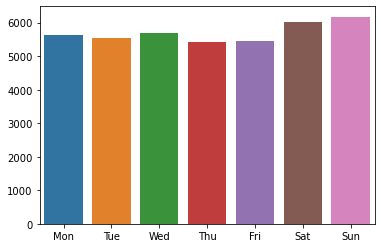

In [20]:
tempdf1 = df.groupby(['year', 'weekday']).agg({'weekday' : 'count'}).rename(columns={'weekday' : 'weekday_count'}).reset_index()
aggregated = tempdf1.groupby(['weekday']).agg({'weekday_count' : 'mean'})

x2 = aggregated.index.tolist()
y2 = aggregated.weekday_count.tolist()

weekmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
x2 = [weekmap[x] for x in x2]
wkmp = {}
for j,x in enumerate(x2):
    wkmp[x] = y2[j]
order = list(weekmap.values())
ordervals = [wkmp[val] for val in order]
sns.barplot(x=order, y=ordervals, data=df);

**number of incidents by every state**

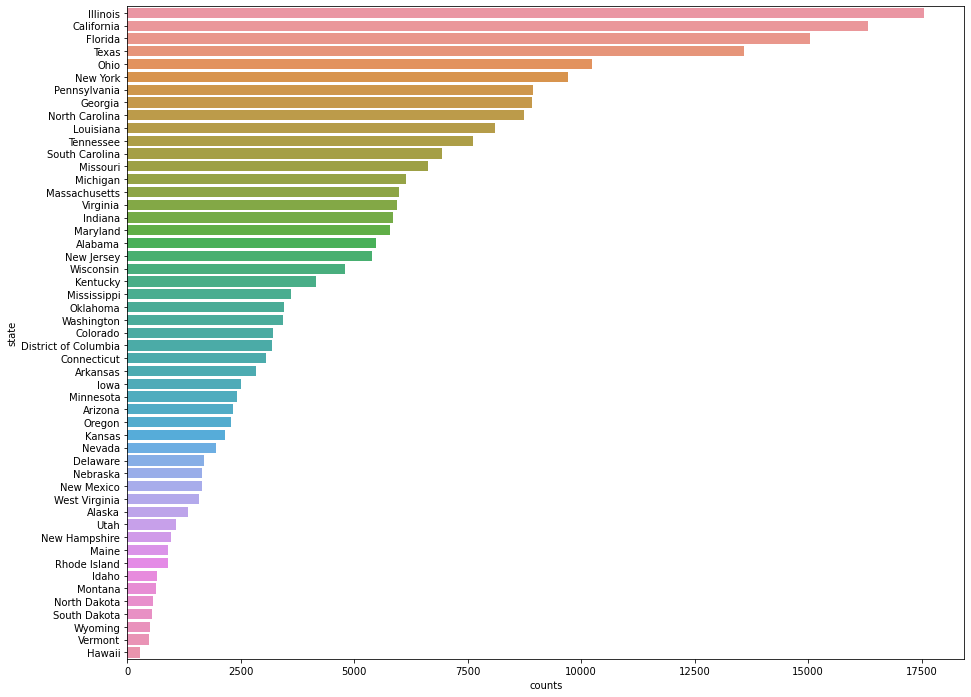

In [33]:
states_df = df['state'].value_counts()
statesdf = pd.DataFrame()
statesdf['state'] = states_df.index
statesdf['counts'] = states_df.values
num_incidents_evey_state = pd.DataFrame(data=statesdf['counts'])
num_incidents_evey_state.set_index(statesdf['state'],inplace=True)
plt.figure(figsize=(15,12));
sns.barplot(x=statesdf['counts'],y=statesdf['state']);

In [2]:
# hello
data = "hello"

In [5]:
import pandas as pd 
df = pd.read_csv("gun-violence-data_01-2013_03-2018.csv")
df.head()

incident_id        date           state city_or_county  \
0       461105  2013-01-01    Pennsylvania     Mckeesport   
1       460726  2013-01-01      California      Hawthorne   
2       478855  2013-01-01            Ohio         Lorain   
3       478925  2013-01-05        Colorado         Aurora   
4       478959  2013-01-07  North Carolina     Greensboro   

                                     address  n_killed  n_injured  \
0  1506 Versailles Avenue and Coursin Street         0          4   
1               13500 block of Cerise Avenue         1          3   
2                      1776 East 28th Street         1          3   
3           16000 block of East Ithaca Place         4          0   
4                  307 Mourning Dove Terrace         2          2   

                                        incident_url  \
0  http://www.gunviolencearchive.org/incident/461105   
1  http://www.gunviolencearchive.org/incident/460726   
2  http://www.gunviolencearchive.org/incident/478855   
3  http://www.gunviolencearchive.org/incident/478925   
4  http://www.gunviolencearchive.org/incident/478959   

                                          source_url  \
0  http://www.post-gazette.com/local/south/2013/0...   
1  http://www.dailybulletin.com/article/zz/201301...   
2  http://chronicle.northcoastnow.com/2013/02/14/...   
3  http://www.dailydemocrat.com/20130106/aurora-s...   
4  http://www.journalnow.com/news/local/article_d...   

   incident_url_fields_missing  ...                    participant_age  \
0                        False  ...                              0::20   
1                        False  ...                              0::20   
2                        False  ...  0::25||1::31||2::33||3::34||4::33   
3                        False  ...         0::29||1::33||2::56||3::33   
4                        False  ...         0::18||1::46||2::14||3::47   

                               participant_age_group  \
0  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
1  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
2  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
3  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
4  0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...   

                            participant_gender  \
0         0::Male||1::Male||3::Male||4::Female   
1                                      0::Male   
2  0::Male||1::Male||2::Male||3::Male||4::Male   
3         0::Female||1::Male||2::Male||3::Male   
4       0::Female||1::Male||2::Male||3::Female   

                                    participant_name  \
0                                     0::Julian Sims   
1                                  0::Bernard Gillis   
2  0::Damien Bell||1::Desmen Noble||2::Herman Sea...   
3  0::Stacie Philbrook||1::Christopher Ratliffe||...   
4  0::Danielle Imani Jameison||1::Maurice Eugene ...   

   participant_relationship  \
0                       NaN   
1                       NaN   
2                       NaN   
3                       NaN   
4                 3::Family   

                                  participant_status  \
0  0::Arrested||1::Injured||2::Injured||3::Injure...   
1      0::Killed||1::Injured||2::Injured||3::Injured   
2  0::Injured, Unharmed, Arrested||1::Unharmed, A...   
3         0::Killed||1::Killed||2::Killed||3::Killed   
4       0::Injured||1::Injured||2::Killed||3::Killed   

                                    participant_type  \
0  0::Victim||1::Victim||2::Victim||3::Victim||4:...   
1  0::Victim||1::Victim||2::Victim||3::Victim||4:...   
2  0::Subject-Suspect||1::Subject-Suspect||2::Vic...   
3  0::Victim||1::Victim||2::Victim||3::Subject-Su...   
4  0::Victim||1::Victim||2::Victim||3::Subject-Su...   

                                             sources state_house_district  \
0  http://pittsburgh.cbslocal.com/2013/01/01/4-pe...                  NaN   
1  http://losangeles.cbslocal.com/2013/01/01/man-...                 62.0   
2  http://www.morningjournal.com/ge

In [6]:
df.describe()

incident_id       n_killed      n_injured  congressional_district  \
count  2.396770e+05  239677.000000  239677.000000           227733.000000   
mean   5.593343e+05       0.252290       0.494007                8.001265   
std    2.931287e+05       0.521779       0.729952                8.480835   
min    9.211400e+04       0.000000       0.000000                0.000000   
25%    3.085450e+05       0.000000       0.000000                2.000000   
50%    5.435870e+05       0.000000       0.000000                5.000000   
75%    8.172280e+05       0.000000       1.000000               10.000000   
max    1.083472e+06      50.000000      53.000000               53.000000   

            latitude      longitude  n_guns_involved  state_house_district  \
count  231754.000000  231754.000000    140226.000000         200905.000000   
mean       37.546598     -89.338348         1.372442             55.447132   
std         5.130763      14.359546         4.678202             42.048117   
min        19.111400    -171.429000         1.000000              1.000000   
25%        33.903400     -94.158725         1.000000             21.000000   
50%        38.570600     -86.249600         1.000000             47.000000   
75%        41.437375     -80.048625         1.000000             84.000000   
max        71.336800      97.433100       400.000000            901.000000   

       state_senate_district  
count           207342.00000  
mean                20.47711  
std                 14.20456  
min                  1.00000  
25%                  9.00000  
50%                 19.00000  
75%                 30.00000  
max                 94.00000